In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\spam.csv',encoding='latin1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [7]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['label_num']=data['label'].map({'ham':0,'spam':1})

In [9]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(data.text,data.label,test_size=0.2,random_state=10)

In [11]:
train_X.head()

5281               And how you will do that, princess? :)
1300    Those cocksuckers. If it makes you feel better...
5128    Wot about on wed nite I am 3 then but only til 9!
1808    Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
856                         Going to take your babe out ?
Name: text, dtype: object

In [12]:
#now lets create bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv=CountVectorizer()

In [14]:
X_traincv=cv.fit_transform(train_X)

In [15]:
X_testcv=cv.transform(test_X)

In [16]:
type(X_testcv)

scipy.sparse.csr.csr_matrix

In [17]:
#now start visualiztion
ham_word=''
spam_word=''
spam=data[data.label_num==1]
ham=data[data.label_num==0]

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
for val in spam.text:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for word in tokens:
        spam_word=spam_word+word+' '
for val in ham.text:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for word in tokens:
        ham_word=ham_word

In [20]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\naveen chauhan\\Anaconda3\\lib\\ntpath.py'>

In [21]:
#machine laarning model to apply on this dataset
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_traincv,train_y)
prediction = dict()

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

prediction["Multinomial"]=model.predict(X_testcv)
accuracy_score(test_y,prediction["Multinomial"])

0.98834080717488793

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logreg=LogisticRegression()

In [25]:
logreg.fit(X_traincv,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
prediction['logregre']=logreg.predict(X_testcv)
accuracy_score(test_y,prediction['logregre'])

0.98026905829596411

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [28]:
knn.fit(X_traincv,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
prediction['knn']=knn.predict(X_testcv)

In [30]:
accuracy_score(test_y,prediction['knn'])

0.91210762331838569

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_traincv,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
prediction['rfc']=rfc.predict(X_testcv)

In [33]:
prediction

{'Multinomial': array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'],
       dtype='<U4'),
 'knn': array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object),
 'logregre': array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object),
 'rfc': array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)}

In [34]:
accuracy_score(test_y,prediction['rfc'])

0.9641255605381166

In [35]:
from  sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_traincv,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [36]:
prediction['abc']=abc.predict(X_testcv)
accuracy_score(test_y,prediction['abc'])

0.96771300448430497

In [37]:
#Now parameter tunning using GridSearchcv
from sklearn.model_selection import GridSearchCV
k_range=np.arange(1,30)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [38]:
param_grid=dict(n_neighbors=k_range)

In [39]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [56]:
model=KNeighborsClassifier()
gsv=GridSearchCV(model,param_grid)

In [57]:
gsv.fit(X_traincv,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
gsv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
gsv.best_params_

{'n_neighbors': 1}

In [44]:
gsv.best_score_

0.94615212026026474

In [45]:
gsv.grid_scores_

C:\Users\naveen chauhan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94615, std: 0.00449, params: {'n_neighbors': 1},
 mean: 0.92259, std: 0.00288, params: {'n_neighbors': 2},
 mean: 0.92349, std: 0.00226, params: {'n_neighbors': 3},
 mean: 0.90554, std: 0.00117, params: {'n_neighbors': 4},
 mean: 0.90621, std: 0.00065, params: {'n_neighbors': 5},
 mean: 0.89410, std: 0.00060, params: {'n_neighbors': 6},
 mean: 0.89455, std: 0.00062, params: {'n_neighbors': 7},
 mean: 0.88580, std: 0.00141, params: {'n_neighbors': 8},
 mean: 0.88602, std: 0.00142, params: {'n_neighbors': 9},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 10},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 11},
 mean: 0.87660, std: 0.00210, params: {'n_neighbors': 12},
 mean: 0.87705, std: 0.00230, params: {'n_neighbors': 13},
 mean: 0.87256, std: 0.00223, params: {'n_neighbors': 14},
 mean: 0.87278, std: 0.00253, params: {'n_neighbors': 15},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 16},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 17},
 mean:

In [46]:
conf_mat=confusion_matrix(test_y,prediction['Multinomial'])
conf_mat_normalized=conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis]

In [47]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Text(0.5,15,'predicted label')

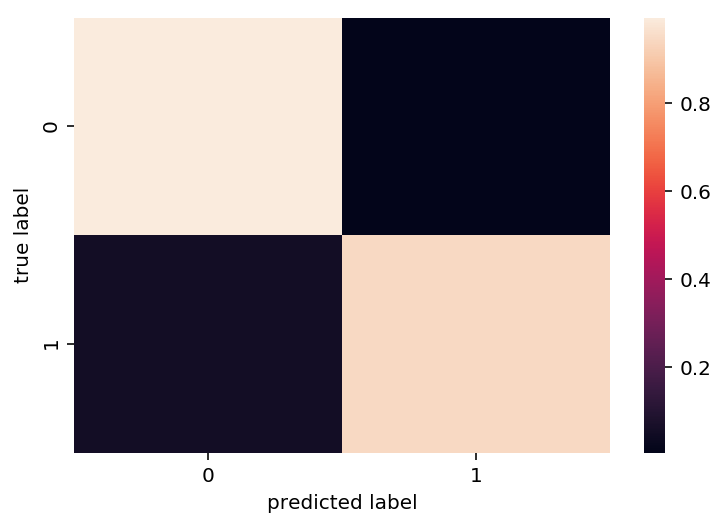

In [48]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [49]:
print(conf_mat)

[[960   5]
 [  8 142]]


In [50]:
pd.set_option('display.max_colwidth',-1)

In [51]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


In [52]:
test_X[test_y<prediction['Multinomial']]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

In [53]:
data['length']=data['text'].apply(len)

In [54]:
data.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",0,61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207B8CA7B70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000207B8DDACC0>], dtype=object)

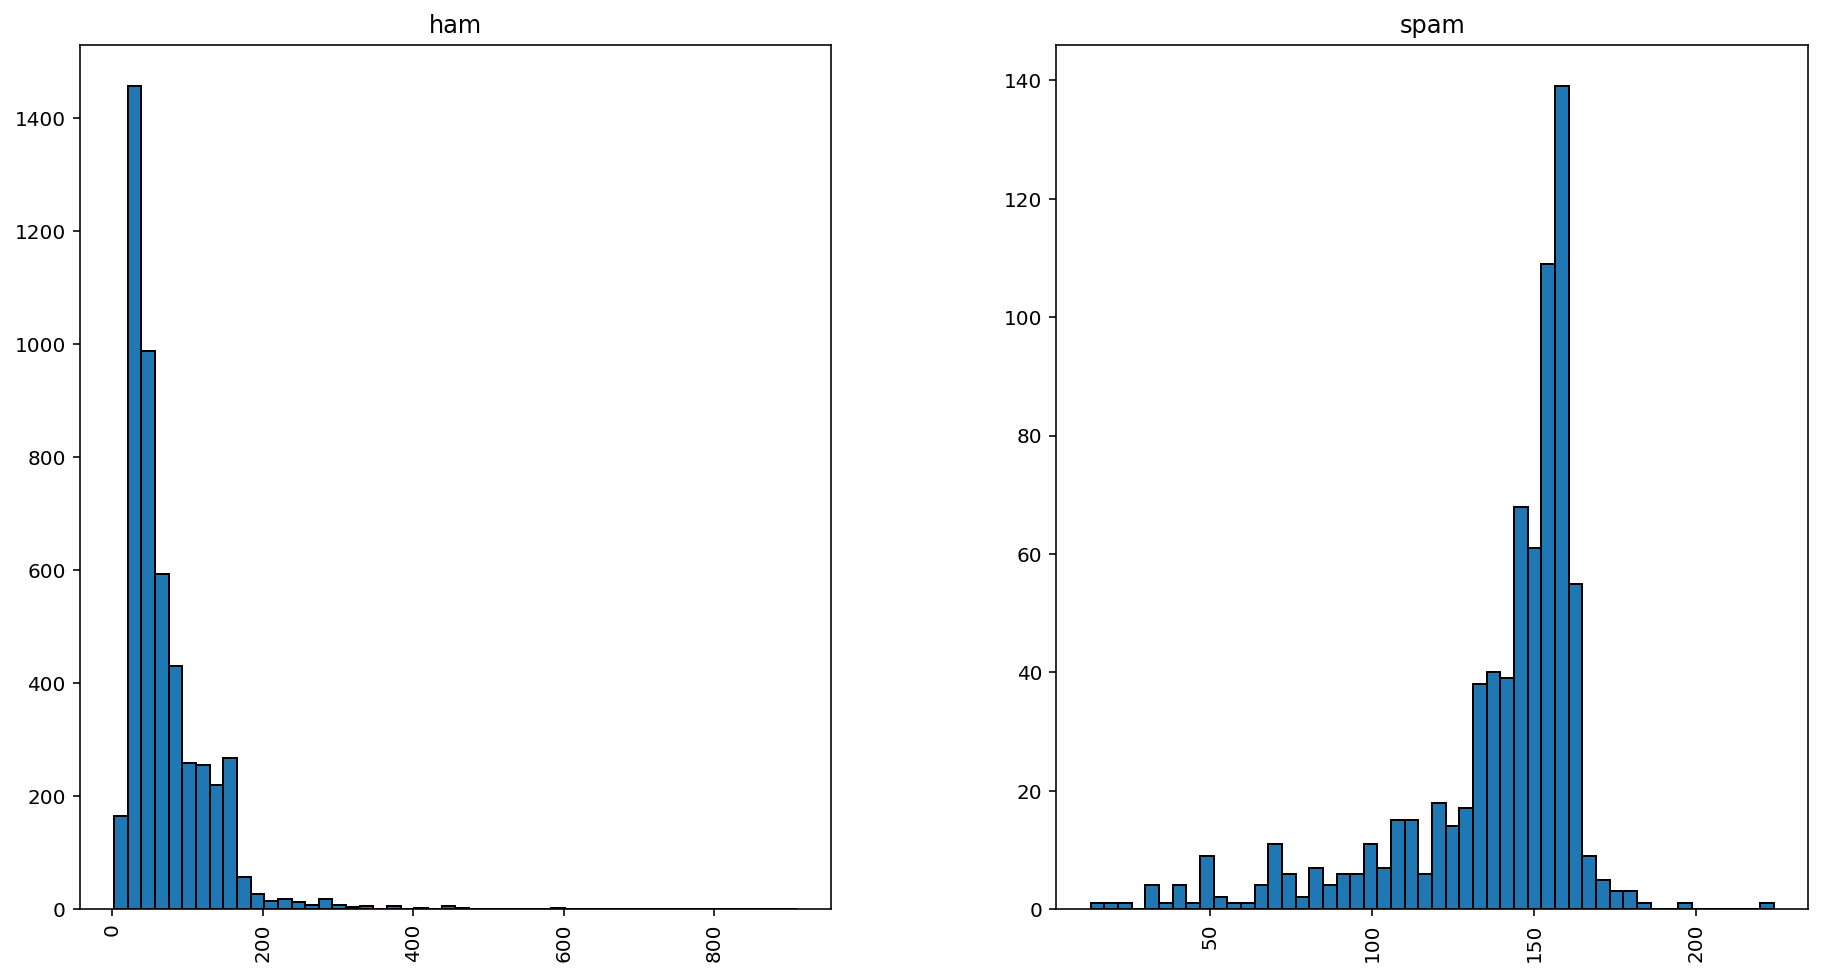

In [60]:
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
data.hist(column='length',by='label',bins=50,figsize=(15,8))

In [ ]:
#further we can use stemmer in this sms classification to incresse the accuracy